# I. Using the Friends dataset build words embeddings using GENSIM and word2vec

In [1]:
import gzip
import gensim
import logging
import pandas as pd
from gensim.utils import simple_preprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential

/Users/isabelasarmiento/pythonProject/venv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# TODO: Comentar ruta_dataset de abajo que es la ruta de colab, y la local para jupyter es la de arriba
ruta_dataset = 'docs/dialogs_friends_filter.csv'
# ruta_dataset = 'drive/MyDrive/dialogs_friends_filter.csv'

df = pd.read_csv(ruta_dataset).dropna()

# imprima las primeras 5 filas
df.head()

print(df.shape)
df.head(20) # returns (rows, columns)

(46514, 2)


raw_character_text                                       spoken_words
0              Monica  There's nothing to tell! He's just some guy I ...
1                Joey  C'mon, you're going out with the guy! There's ...
2            Chandler  All right Joey, be nice.  So does he have a hu...
3              Phoebe                           Wait, does he eat chalk?
4              Phoebe  Just, 'cause, I don't want her to go through w...
5              Monica  Okay, everybody relax. This is not even a date...
6            Chandler                          Sounds like a date to me.
7            Chandler  Alright, so I'm back in high school, I'm stand...
8            Chandler  Then I look down, and I realize there's a phon...
9                Joey                                     Instead of...?
10           Chandler                                      That's right.
11               Joey                              Never had that dream.
12             Phoebe                                                No.
13           Chandler  All of a sudden, the phone starts to ring. Now...
14             Monica           And they weren't looking at you before?!
15           Chandler  Finally, I figure I'd better answer it, and it...
16               Ross                                    (mortified) Hi.
17               Joey          This guy says hello, I wanna kill myself.
18             Monica                             Are you okay, sweetie?
19               Ross  I just feel like someone reached down my throa...

In [3]:
def preproccess(line):
    return simple_preprocess(line)

df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

raw_character_text                                       spoken_words  \
0             Monica  There's nothing to tell! He's just some guy I ...   
1               Joey  C'mon, you're going out with the guy! There's ...   
2           Chandler  All right Joey, be nice.  So does he have a hu...   
3             Phoebe                           Wait, does he eat chalk?   
4             Phoebe  Just, 'cause, I don't want her to go through w...   
5             Monica  Okay, everybody relax. This is not even a date...   
6           Chandler                          Sounds like a date to me.   
7           Chandler  Alright, so I'm back in high school, I'm stand...   
8           Chandler  Then I look down, and I realize there's a phon...   
9               Joey                                     Instead of...?   

                                           proccesed  
0  [there, nothing, to, tell, he, just, some, guy...  
1  [mon, you, re, going, out, with, the, guy, the...  
2  [all, right, joey, be, nice, so, does, he, hav...  
3                       [wait, does, he, eat, chalk]  
4  [just, cause, don, want, her, to, go, through,...  
5  [okay, everybody, relax, this, is, not, even, ...  
6                       [sounds, like, date, to, me]  
7  [alright, so, back, in, high, school, standing...  
8  [then, look, down, and, realize, there, phone,...  
9                                      [instead, of]

In [4]:
documents = df['proccesed'].to_numpy()

### Generate 150 sized Word2vec embbedings

In [5]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_150 = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
#model_150 = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10, sg=1)

model_150.train(documents, total_examples=len(documents), epochs=10)

(3685851, 5213860)

In [6]:
model_150.save("Friends_150_5.model")

In [7]:
print(model_150.wv['everybody'])

[ 0.01556432 -0.05917447 -0.47972795  0.28081128  0.14187843 -0.46845466
 -0.04682913 -0.17009117 -1.215684   -0.03227844  0.7287302  -0.22951241
  0.2270359   0.36848852 -0.00404335  0.23844689  0.504667    0.02615968
  0.06209964 -0.26005659 -0.011861    0.10163584 -0.25834706 -0.02185067
 -0.371368   -0.13342366 -0.03013019  0.04160877 -0.05122993 -0.2282882
 -0.38097194 -0.20963106 -0.35298932 -0.3479227  -0.41260132  0.17237286
  0.43697366  0.39901236 -0.44704124 -0.4890561  -0.07516876  0.07719798
  0.21563251  0.10508287  0.4163937  -0.29693756 -0.25599435  0.2037652
  0.57349926 -0.02727768  0.12343038  0.21965341 -0.39177117 -0.36091405
  0.23495881 -0.28890613 -0.28628787 -0.11667906  0.17342304 -0.08215576
  0.22418125 -0.5143045  -0.54297096  0.07584438 -0.4098012   0.659378
 -0.47994134 -0.7262907  -0.06157446 -0.08735522  0.12869443 -0.1336379
  0.21591847 -0.23967727 -0.1672972   0.35637492  0.21975549  0.02215093
 -0.18785623  0.16036645  0.23618753 -0.21541815 -0.1806

### Generate 100 sized Word2vec embbedings

In [8]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
# model_100 = gensim.models.Word2Vec (documents, size=100, window=10, min_count=2, workers=10, sg=1)

model_100.train(documents,total_examples=len(documents),epochs=10)

(3684963, 5213860)

In [9]:
model_100.save("Friends_100_5.model")

In [10]:
print(model_100.wv['everybody'])

[ 0.47310084 -0.11155564 -0.0052927   0.08333763  0.24964693 -0.17003411
  0.41372797  0.14517373 -0.31561998  0.2830296  -0.44864932 -0.45994088
 -0.616723    0.00239477  0.48702487 -0.38753733  0.00837898 -0.08867222
  0.10273467 -0.16934198  0.87383074  0.00181766 -0.27007565  0.5841692
 -0.13938436 -0.27263123 -0.6113805  -0.512781    0.5752441   0.25964957
 -0.08035787 -0.40149534  0.183318   -0.17599086 -0.18385771  0.38540328
 -0.5869044  -0.6287547   0.01254838  0.15210867  0.37357858 -0.6421696
 -0.10701478  0.46854544 -0.22172134 -0.533702    0.4968302   0.17846273
  0.08478571 -0.0902228   0.38300854 -0.18585382 -0.1025009  -0.18482852
  0.495609   -0.07108188 -0.15519115  0.04605524 -0.191219   -0.03551385
  0.36459094 -0.06725681  0.00570681 -0.29000068 -1.0537268  -0.20296434
 -0.50522524 -0.2478227  -0.66486615  0.09878755 -0.02060848  0.24993138
  0.40368924 -0.7408748   0.12603599 -0.18061422  0.03629756  0.24711673
 -0.32900038 -0.07069913 -0.0131088   0.13620032 -0.5

### Generate 50 sized Word2vec embbedings

In [11]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
# model_50 = gensim.models.Word2Vec(documents, size=50, window=10, min_count=2, workers=10, sg=1)

model_50.train(documents, total_examples=len(documents),epochs=10)

(3684900, 5213860)

In [12]:
model_50.save("Friends_50_5.model")

In [13]:
df.shape

(46514, 3)

## Load from disk the generated models

In [14]:
model50 = gensim.models.Word2Vec.load("Friends_50_5.model")
model100 = gensim.models.Word2Vec.load("Friends_100_5.model")
model150 = gensim.models.Word2Vec.load("Friends_150_5.model")

In [15]:
model50.wv.similar_by_word('chandler')

[('joey', 0.8591502904891968),
 ('ross', 0.813774585723877),
 ('monica', 0.7920690774917603),
 ('wonders', 0.7392842173576355),
 ('rachel', 0.7335072159767151),
 ('approval', 0.7301857471466064),
 ('closely', 0.7104547619819641),
 ('giggle', 0.7101901769638062),
 ('trail', 0.7094511985778809),
 ('hence', 0.7070382237434387)]

In [16]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

# I. 2D Graphs and analysis
***

**Vector dimension:** 50

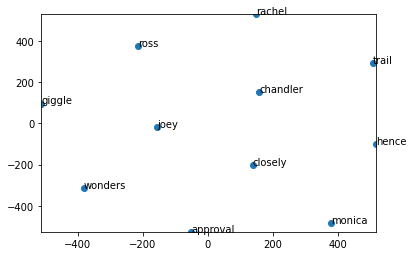

In [17]:
display_closestwords_tsnescatterplot(model50, 'chandler', 50)

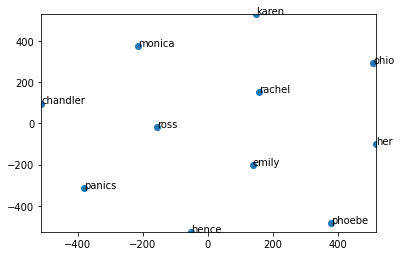

In [18]:
display_closestwords_tsnescatterplot(model50, 'rachel', 50)

**Vector dimension:** 100

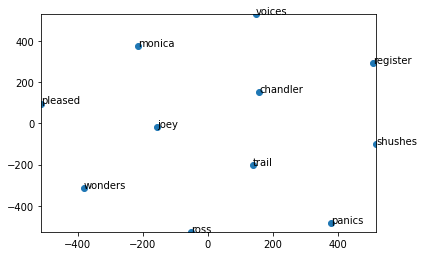

In [19]:
display_closestwords_tsnescatterplot(model100, 'chandler', 100)

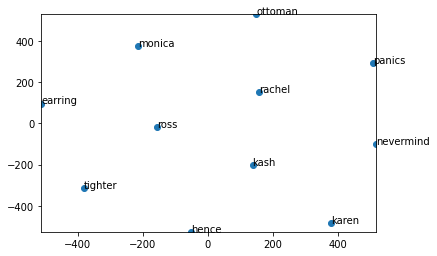

In [20]:
display_closestwords_tsnescatterplot(model100, 'rachel', 100)

**Vector size:** 150

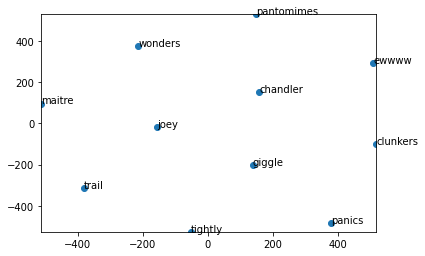

In [21]:
display_closestwords_tsnescatterplot(model150, 'chandler', 150)

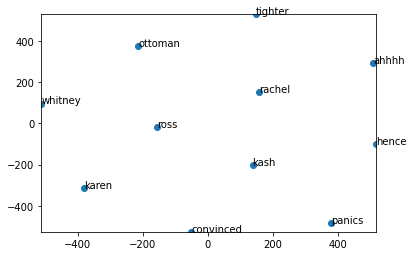

In [22]:
display_closestwords_tsnescatterplot(model150, 'rachel', 150)

# III. Redes neuronales

## Preparacion de los datos

In [23]:
'''
Aquí se filtra el dataset para que solo queden los dialogos relevantes, los de ls personajes principales.
'''
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv(ruta_dataset).dropna() 

# Esto sirve para saber cuantas categorías hay, abajo se usa. Por favor no borrar.
target_friends = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']

In [24]:
'''
Se realiza un Encoding de los nombres de los personajes principales. 
La idea es que cada categoría de personaje este codificada por un vector
1x6 binario. 
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

[array(['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross'],
      dtype=object)]


In [25]:
'''
Se dividen los datos en 60 training, 20 validación y 20 testing
'''
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values

y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test, y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [26]:
vectorize_layer = TextVectorization(
    ngrams=None, max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

In [27]:
vectorize_layer.adapt(text_dataset.batch(32))
len(vectorize_layer.get_vocabulary())

14020

# 3. Multinomial classification using Embbedings

In [28]:
# Load pretrained models
model_50 = gensim.models.Word2Vec.load("Friends_50_5.model")
model_100 = gensim.models.Word2Vec.load("Friends_100_5.model")
model_150 = gensim.models.Word2Vec.load("Friends_150_5.model")

In [29]:
# pretrained.wv.index_to_key

def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) 
    embedding_dim = len(embedding['chandler'])
    hits = 0
    misses = 0
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for i in range(len(vocab)):
        try:
            weight_matrix[i] = embedding[vocab[i]]
            hits += 1
        except:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))
    return weight_matrix

In [30]:

x_train = vectorize_layer(np.array([[s] for s in sentences_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in sentences_val])).numpy()

y_train = np.array(y_train)
y_val = np.array(y_val)

In [31]:
print(x_train.shape)
print(x_val.shape)
# print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
# print(y_test.shape)

(27908, 14020)
(9303, 14020)
(27908, 6)
(9303, 6)


In [32]:
def generatePreEmbbedingModel(model, embedding_dim, vectorize_layer, architecture_id = 1):
    batch_size = 32
    epochs = 10
    weights = get_weight_matrix(model.wv, vectorize_layer.get_vocabulary())
    num_tokens = len(vectorize_layer.get_vocabulary()) 
    embedding_layer = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(weights),
        trainable=False,
    )

    int_sequences_input = tf.keras.Input(shape=(None,), dtype='int64')
    embedded_sequences = embedding_layer(int_sequences_input)
    x = layers.GlobalAveragePooling1D()(embedded_sequences)

    if architecture_id == 1:
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 2:
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dense(250, activation='relu')(x)
    elif architecture_id == 3:
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(250, activation='relu')(x)
        x = layers.Dropout(0.5)(x)

    preds = layers.Dense(len(target_friends), activation='softmax')(x)
    modelRN = tf.keras.Model(int_sequences_input, preds)

    return modelRN

In [33]:
#Parameters
batch_size = 32
epochs = 10

## Primera Arquitectura

In [34]:
red_50_1 = generatePreEmbbedingModel(model_50, 50, vectorize_layer)
red_100_1 = generatePreEmbbedingModel(model_100, 100, vectorize_layer)
red_150_1 = generatePreEmbbedingModel(model_150, 150, vectorize_layer)

Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)


In [35]:
red_50_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 50)          701000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
Total params: 701,576
Trainable params: 576
Non-trainable params: 701,000
_________________________________________________________________


In [36]:
red_100_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         1402000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
Total params: 1,403,076
Trainable params: 1,076
Non-trainable params: 1,402,000
_________________________________________________________________


In [37]:
red_150_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 150)         2103000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1510      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 2,104,576
Trainable params: 1,576
Non-trainable params: 2,103,000
_________________________________________________________________


In [38]:
red_50_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [39]:
red_50_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 84s 95ms/step - loss: 1.7905 - accuracy: 0.1791 - val_loss: 1.7897 - val_accuracy: 0.1845

In [40]:
red_100_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 177s 202ms/step - loss: 1.7905 - accuracy: 0.1776 - val_loss: 1.7897 - val_accuracy: 0.1845

In [ ]:
red_150_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 229s 262ms/step - loss: 1.7904 - accuracy: 0.1837 - val_loss: 1.7898 - val_accuracy: 0.1845

In [ ]:
red_50_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
red_50_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
red_100_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
red_150_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

## Segunda Arquitectura

In [ ]:

red_50_2 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 2)
red_100_2 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 2)
red_150_2 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 2)

In [ ]:
red_50_2.summary()

In [ ]:
red_100_2.summary()

In [ ]:
red_150_2.summary()

In [ ]:
red_50_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
red_50_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
red_100_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
red_150_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

## Tercer Arquitectura

In [ ]:
red_50_3 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 3)
red_100_3 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 3)
red_150_3 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 3)

In [ ]:
red_50_3.summary()

In [ ]:
red_100_3.summary()

In [ ]:
red_150_3.summary()

In [ ]:
red_50_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
red_50_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
red_100_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
red_150_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
